In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.ensemble import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [ ]:
from pyramid.arima import auto_arima

In [2]:
ALL = pd.read_csv("ALLtrain")
ALL = ALL.drop(['Unnamed: 0'],axis=1)
ALL = ALL.fillna(0)

In [3]:
ALL.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.475064,0.546864,0.553922,0.342491,0.502410,0.541063,0.479042,...,0.409893,0.480777,0.628029,0.500000,0.463959,0.660638,0.554701,0.473079,0.500000,0.516351
1,0,1,2,0.477701,0.497640,0.633506,0.599260,0.412426,0.634461,0.489521,...,0.327865,0.478160,0.314635,0.488903,0.481040,0.508478,0.346304,0.469467,0.518900,0.420388
2,0,1,3,0.475064,0.500674,0.406286,0.620658,0.494912,0.362856,0.507485,...,0.562267,0.481118,0.506964,0.550879,0.485860,0.526080,0.500461,0.471251,0.488960,0.675883
3,0,1,4,0.472799,0.504046,0.505190,0.666887,0.432244,0.359098,0.522455,...,0.460104,0.483355,0.371589,0.529313,0.486781,0.489019,0.543628,0.479521,0.572043,0.488933
4,0,1,5,0.637231,0.563722,0.461649,0.482631,0.502410,0.674181,0.491018,...,0.388516,0.637749,0.453730,0.460218,0.407896,0.645781,0.548959,0.465941,0.546594,0.517424


In [4]:
ALL.columns

Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

In [5]:
#déjà fait
#scaler = preprocessing.MinMaxScaler() 
list_ndiscrt = list(ALL.columns.values)
list_ndiscrt.remove('simulationRun')
list_ndiscrt.remove('faultNumber')
list_ndiscrt.remove('sample')



#ALL[list_ndiscrt] = scaler.fit_transform(ALL.drop(['simulationRun','faultNumber','sample'],axis=1))

In [6]:
ALL.head()

#histoire de ne pas reloader le dataset entier si jamais on modifie un truc 
ALL[ALL['simulationRun'] < 4][ALL['faultNumber'] < 4].to_csv('ALLTrainMini')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
#on fait un dataset beaucoup plus petit qui nous servira pour étudier les courbes plus facilement

In [2]:
######################################################
ALL = pd.read_csv("ALLTrainMini")
ALL = ALL.drop(['Unnamed: 0'],axis=1)
######################################################

In [ ]:
# visualisation d'une courbe ( 500 points ) d'une simulation

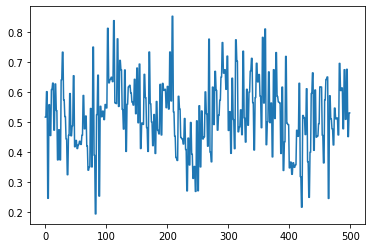

In [123]:
plt.plot(ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_34)

In [4]:
courbe1 = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_34

In [125]:
courbe1.index  = pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=500, freq='H'))

In [126]:
#indexDate = pd.date_range(start = '2020 Jul 2 00:00', end = '2020 July 3 00:57', freq = '0.05H')
#courbe1.index = indexDate

In [127]:
len(indexDate)

500

In [ ]:
## on essaye de trouver une fréquence dans la courbe afin de remplir les paramètres de arima etc..

<Figure size 1152x1152 with 0 Axes>

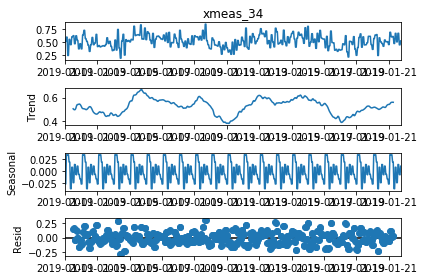

In [128]:

decomposition = seasonal_decompose(courbe1, model='additive')
plt.figure(figsize=(16,16))
fig = decomposition.plot()
plt.show()

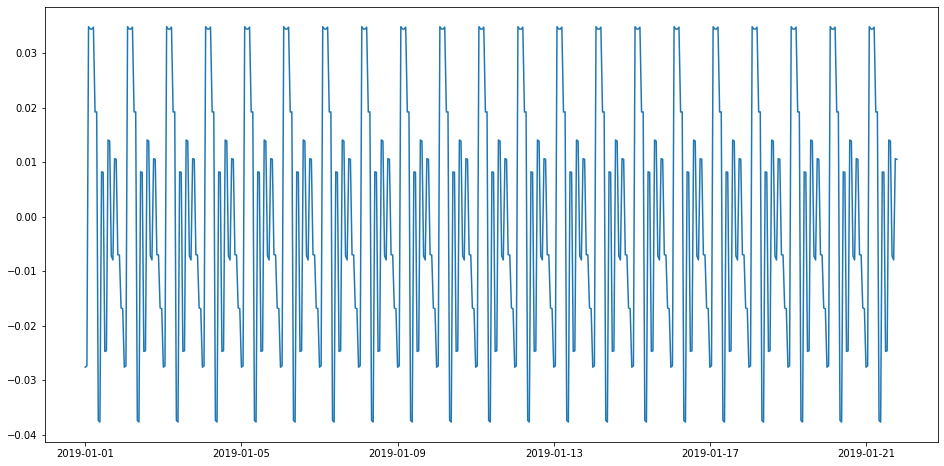

In [129]:
plt.figure(figsize = (16,8))
plt.plot(decomposition.seasonal) # period of 25 points = 75 minutes

In [130]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [131]:
# auto arima permet de trouver les paramètres automatiquement
tempo = courbe1[0:400]
from pyramid.arima import auto_arima
model = auto_arima(tempo, trace=True, error_action='ignore', suppress_warnings=True,  m=25)

/usr/local/lib64/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/AI357/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package nam

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 25); AIC=-791.923, BIC=-759.991, Fit time=19.306 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 25); AIC=-529.073, BIC=-521.090, Fit time=0.153 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 25); AIC=-678.501, BIC=-662.535, Fit time=10.011 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 25); AIC=-812.897, BIC=-796.931, Fit time=5.780 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 25); AIC=-799.726, BIC=-779.769, Fit time=12.505 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 25); AIC=-814.389, BIC=-802.415, Fit time=0.403 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 25); AIC=-817.567, BIC=-801.602, Fit time=0.532 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 25); AIC=-680.492, BIC=-668.518, Fit time=0.487 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 25); AIC=-833.163, BIC=-813.206, Fit time=1.500 seconds
Fit ARIMA: order=(2, 0, 3

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 0, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 25), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')


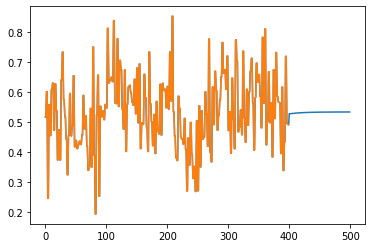

In [142]:
#on applique les paramètres trouvés

model_fit = model.fit(tempo)
print(model_fit)
#arimamodel = ARIMA(tempo, order=(10,1,0))
#model_fit = arimamodel.fit(disp=0)
out = model_fit.predict(100)
pandaS = pd.Series(out,copy=True)
tempoP= tempo.append(pandaS)
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=500, freq='H'))
plt.plot(np.asarray(tempoP))
plt.plot(np.asarray(tempo))
plt.show()

In [ ]:
#on remarque que ca fonctionne vraiment mal

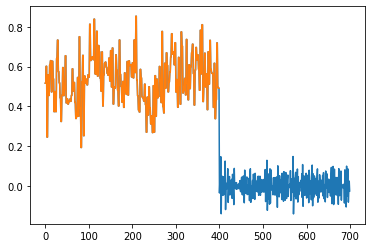

In [147]:

tempo = courbe1[0:400]
arimamodel = ARIMA(tempo, order=(1,1,1))
model_fit = arimamodel.fit(disp=0)
out = model_fit.predict(100)
pandaS = pd.Series(out,copy=True)
tempoP= tempo.append(pandaS)

plt.plot(np.asarray(tempoP))
plt.plot(np.asarray(tempo))
plt.show()

In [ ]:
#fonctionne pas non plus

In [111]:
# test sur la fonction linéaire Holt

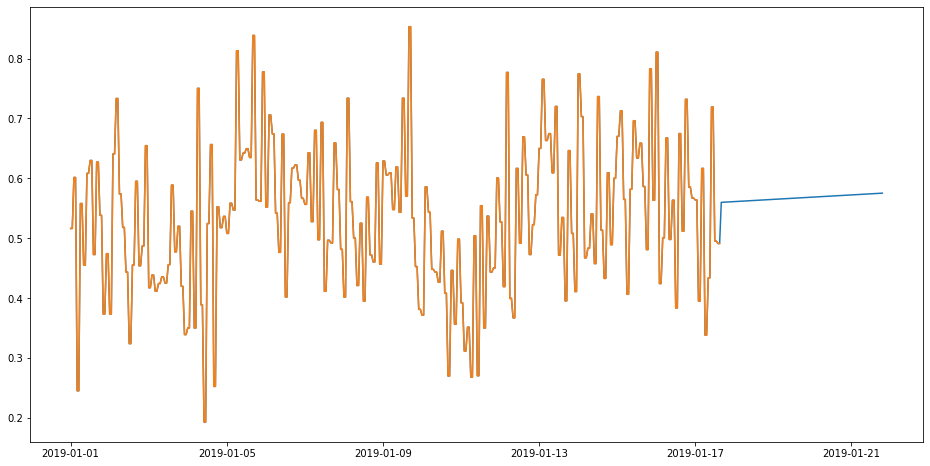

In [116]:
tempo = courbe1[0:400]
fit1 = Holt(np.asarray(tempo)).fit(smoothing_level = 0.01,smoothing_slope = 0.01)
pred = fit1.forecast(100)
plt.figure(figsize=(16,8))
tempoP = tempo.append(pd.Series(pred))
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=500, freq='H'))            
plt.plot(tempoP)
plt.plot(tempo)
plt.show()

In [49]:
rms = np.sqrt(metrics.mean_squared_error(courbe1[400:500], pred))
print(rms)

0.14458882288992048


In [4]:
#une fonction linéaire ne peut correctement décrire notre courbe

In [ ]:
### ExponentialSmoothing, prédiction de 500 points

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


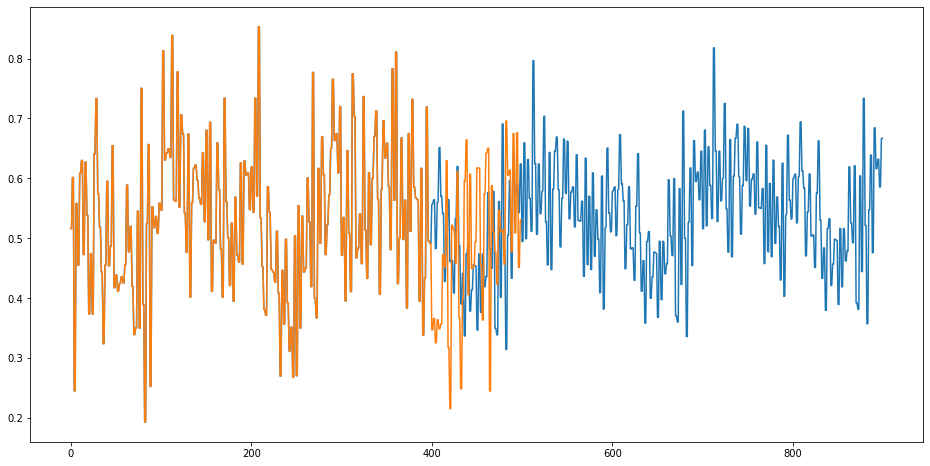

In [109]:
tempo = courbe1[0:400]
fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='add',  seasonal_periods=200 ).fit()
pred = fit1.forecast(500)
#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])

plt.figure(figsize=(16,8))
tempoP = tempo.append(pd.Series(pred))
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=900, freq='H'))  

tempo = courbe1[0:400]
tempo.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=400, freq='H'))  

tempo = np.asarray(tempo)
tempoP = np.asarray(tempoP)
plt.plot(tempoP)
plt.plot(np.asarray(courbe1[0:500]))
plt.show()

In [108]:
rms = np.sqrt(metrics.mean_squared_error(courbe1[400:500], pred[0:100]))
print(rms)

0.15272122886940798


In [ ]:
# cela fonctionne plutot pas mal

In [ ]:
## test sarimax

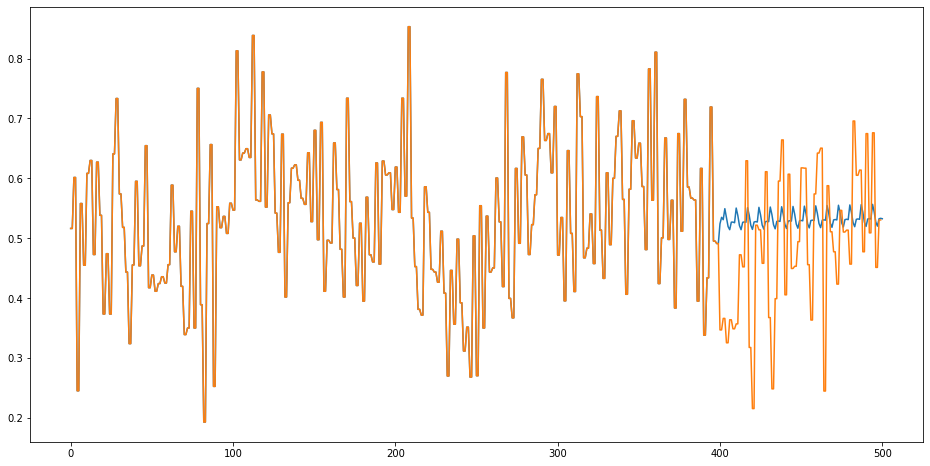

In [150]:


tempo = courbe1[0:400]
tempo.index  = pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=400, freq='H'))

fit1 = SARIMAX(tempo, order=(2, 1, 1),seasonal_order=(0,1,1,7)).fit()
pred = fit1.predict(start=tempo.index[-1], end=courbe1.index[-1], dynamic=True)

plt.figure(figsize=(16,8))
tempoP = tempo.append(pd.Series(pred))
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=501, freq='H'))            


plt.plot(np.asarray(tempoP))
plt.plot(np.asarray(courbe1))
plt.show()

In [ ]:
#fonctionne vraiment mal, les paramètres sont trop compliqués à trouver ==> pas assez pratique

In [ ]:
#on prend une courbe au hasard

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


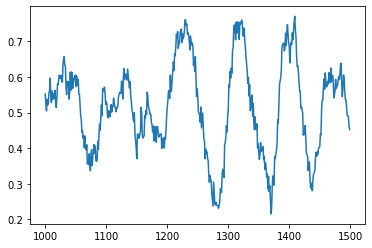

In [32]:
courbe1 = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20
plt.plot(courbe1)

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


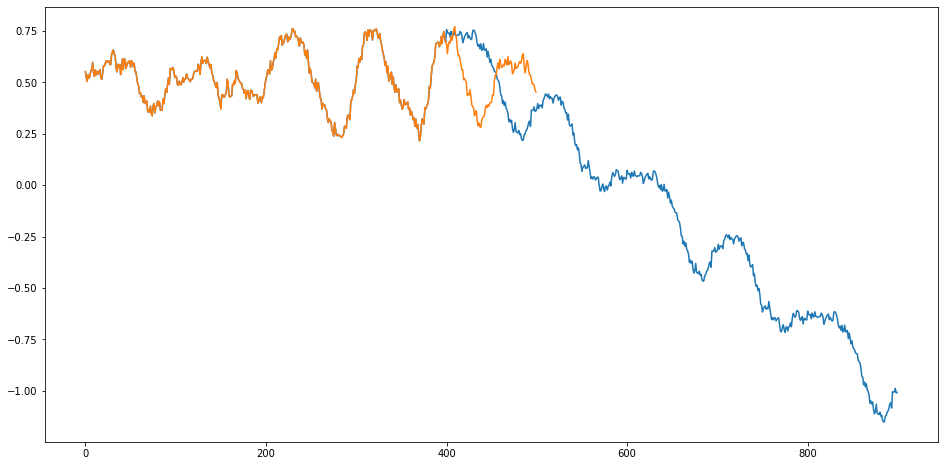

In [33]:
tempo = courbe1[0:400]
fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='add',  seasonal_periods=200 ).fit()
pred = fit1.forecast(500)
#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])

plt.figure(figsize=(16,8))
tempoP = tempo.append(pd.Series(pred))
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=900, freq='H'))  

tempo = courbe1[0:400]
tempo.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=400, freq='H'))  

tempo = np.asarray(tempo)
tempoP = np.asarray(tempoP)
plt.plot(tempoP)
plt.plot(np.asarray(courbe1[0:500]))
plt.show()

In [ ]:
#cela ne fonctionne pas toujours non plus

In [ ]:
#on prend une autre courbe

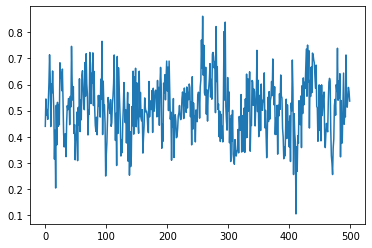

In [9]:
courbe1 = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_21
plt.plot(courbe1)

In [ ]:
# ExponentialSmoothing / prédiction sur 500 points

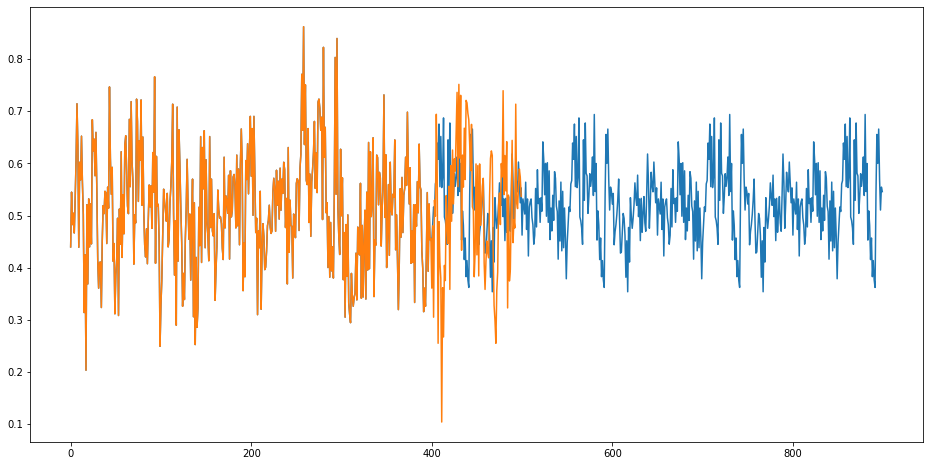

In [40]:
tempo = courbe1[0:400]
fit1 = ExponentialSmoothing(np.asarray(tempo) , trend=None, seasonal='mul',  seasonal_periods=150 ).fit()
pred = fit1.forecast(500)
#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])

plt.figure(figsize=(16,8))
tempoP = tempo.append(pd.Series(pred))
tempoP.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=900, freq='H'))  

tempo = courbe1[0:400]
tempo.index =  pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=400, freq='H'))  

tempo = np.asarray(tempo)
tempoP = np.asarray(tempoP)
plt.plot(tempoP)
plt.plot(np.asarray(courbe1[0:500]))
plt.show()

In [ ]:
# le résultat semble correct mais ne reflète pas la réalité

In [ ]:
###################################################### 1 point prediction

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retva

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retva

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


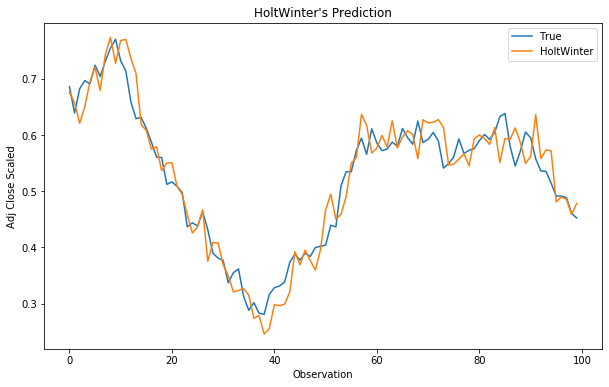

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [19]:



#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])
pointspred = []
for i in range(400,500):
    tempo = courbe1[0:i]
    fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='mul',  seasonal_periods=150 ).fit()
    pred = fit1.forecast(1)
    pointspred.append(pred)
      
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(courbe1[400:500]), label='True')
plt.plot(np.asarray(pointspred), label='HoltWinter')
plt.title("HoltWinter's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();    

plt.figure(figsize=(16,8))


In [ ]:
#fonctionne pas mal

In [ ]:
###################################################### 2 points prediction

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retva

[0.6877591913524052, 0.6688724327377381, 0.6519899308687425, 0.6404887925849178, 0.6938721812282685, 0.7134049795340792, 0.6845042789353852, 0.7148719197901168, 0.7593862091195211, 0.7408931133045368, 0.7493604140616288, 0.7690602630405008, 0.735832240071127, 0.7543013648104645, 0.7414863790872276, 0.7379477722171826, 0.5818957197954534, 0.5752248909389616, 0.5523557066241906, 0.5472874847893774, 0.5394350345710588, 0.5290536262656033, 0.519379362113269, 0.4914191146704036, 0.4268952397905963, 0.42862391052338084, 0.43285270526762004, 0.3580998370859779, 0.4256516370169282, 0.4476004468221049, 0.427142272568081, 0.41311863227167356, 0.3228833021167261, 0.2967670753052138, 0.2628161861760594, 0.26154373610429504, 0.2717113419592031, 0.24584612677996348, 0.19871462510285165, 0.1785372729481344, 0.2859459850447863, 0.2551819283193624, 0.21735529750405477, 0.19645970769098592, 0.39816616683841166, 0.39008747770755503, 0.4245180761784986, 0.416491698607135, 0.358610023195003, 0.369074188754

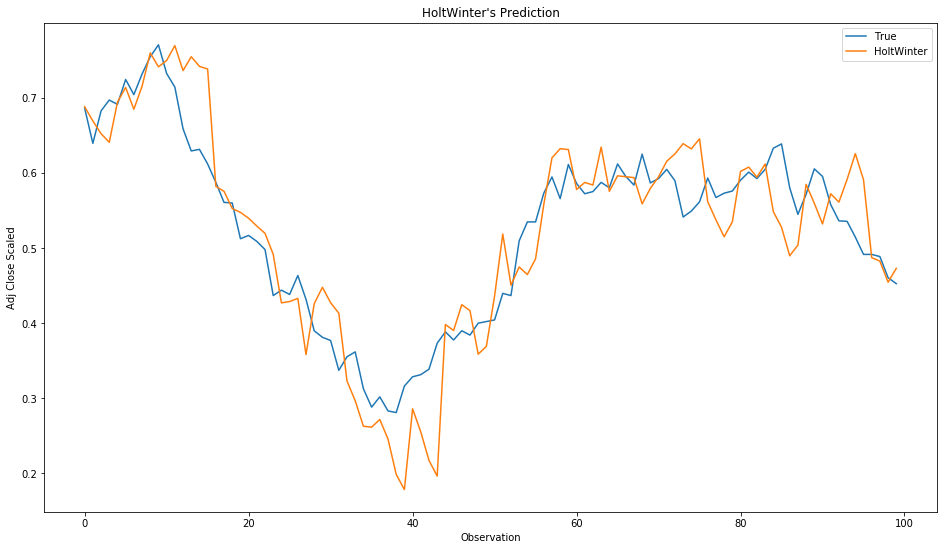

In [215]:



#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])
pointspred = []
for i in range(400,500,4):
    tempo = courbe1[0:i]
    fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='add',  seasonal_periods=150 ).fit()
    pred = fit1.forecast(4)
    for predic in pred:
        pointspred.append(predic)
    
print(pointspred)


plt.figure(figsize=(16, 9))
plt.plot(np.asarray(courbe1[400:500]), label='True')
plt.plot(pointspred, label='HoltWinter')
plt.title("HoltWinter's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();   


In [ ]:
#fonctionne pas mal

In [ ]:
###################################################### 4 points prediction

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retva

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retva

/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


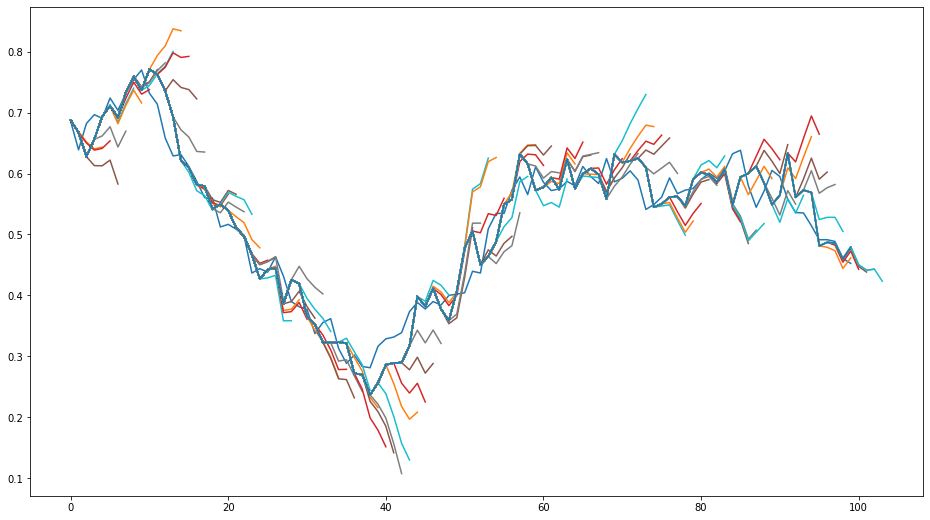

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [207]:



#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])
pointspred = []
for i in range(400,500):
    tempo = courbe1[0:i]
    fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='add',  seasonal_periods=150 ).fit()
    pred = fit1.forecast(5)
    if i!=400:
        avanttab = pointspred[-1]
        
        pointspred.append(avanttab + list(pred) )
        pointspred.append(avanttab + [pred[0]] )
    else:
        pointspred.append(pred)
        pointspred.append([pred[0]])
        

plt.figure(figsize=(16, 9))
plt.plot(np.asarray(courbe1[400:500]), label='True')

for c in pointspred:
    #print(c)
    plt.plot(c, label='HoltWinter')

plt.show();    

plt.figure(figsize=(16,8))


In [ ]:
#on sent que au delà de 4 points, la prédiction devient n'importe quoi

#4*3 = 12 minutes de prédiction

In [ ]:
## deep learning

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [23]:
courbe1 = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20

In [24]:
courbe1.head()

0    0.551873
1    0.521614
2    0.504323
3    0.536744
4    0.521614
Name: xmeas_20, dtype: float64

In [25]:
courbe1.index = pd.DatetimeIndex(pd.date_range('2019-01-01 00:00', periods=500, freq='H')) 

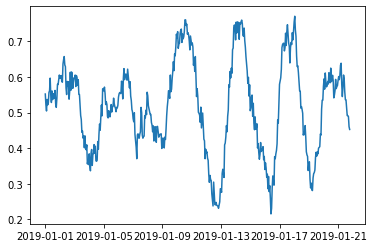

In [26]:
plt.plot(courbe1)

In [32]:
train = courbe1[0:400]
test = courbe1[400:500]

X_train = train[:-1]
y_train = train[1:]


X_test = test[:-1]
y_test = test[1:]

In [33]:
len(test)

100

In [ ]:
######################## model sequentiel basique

In [312]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)


history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0757
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 10/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 11/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 12/100
399/399 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 13/100


In [313]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(metrics.r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.867
The R2 score on the Test set is:	0.852


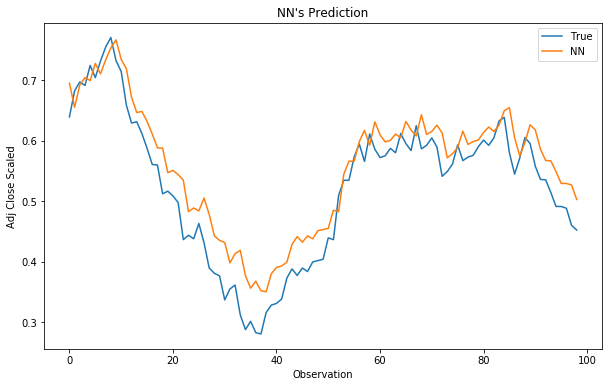

In [314]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_test), label='True')
plt.plot(np.asarray(y_pred_test_nn), label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

In [ ]:
#fonctionne pas mal 

In [34]:
X_train_lmse = np.reshape(np.array(X_train), (X_train.shape[0], 1, 1))
X_test_lmse = np.reshape(np.array(X_test), (X_test.shape[0], 1, 1))

In [ ]:
############################## lstm basique

In [86]:
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
399/399 [==============================] - 2s 6ms/step - loss: 0.1791
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0138
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0110
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0096
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0081
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0067
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0054
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0042
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0031
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0023
Epoch 11/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0017
Epoch 12/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0014
Epoch 13/100


In [87]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(metrics.r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.934
The R2 score on the Test set is:	0.932


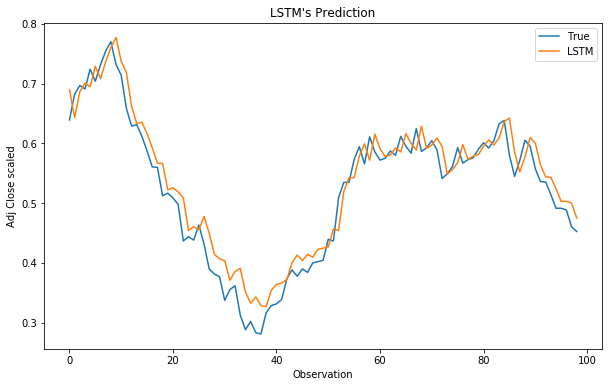

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_test), label='True')
plt.plot(np.asarray(y_pred_test_lstm), label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [ ]:
# fonctionne largemnt mieux

In [ ]:
########################  lstm statefull true

In [92]:
lstm_model = Sequential()
lstm_model.add(LSTM(8, batch_input_shape=(1,1,1),stateful=True, activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=35, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/35
399/399 [==============================] - 2s 5ms/step - loss: 0.1916
Epoch 2/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0225
Epoch 3/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0147
Epoch 4/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0135
Epoch 5/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0121
Epoch 6/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0105
Epoch 7/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0085
Epoch 8/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0059
Epoch 9/35
399/399 [==============================] - 2s 5ms/step - loss: 0.0037
Epoch 10/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0026
Epoch 11/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 12/35
399/399 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 13/35
399/399 [====

In [93]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse,batch_size=1)
y_train_pred_lstm = lstm_model.predict(X_train_lmse,batch_size=1)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(metrics.r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.880
The R2 score on the Test set is:	0.853


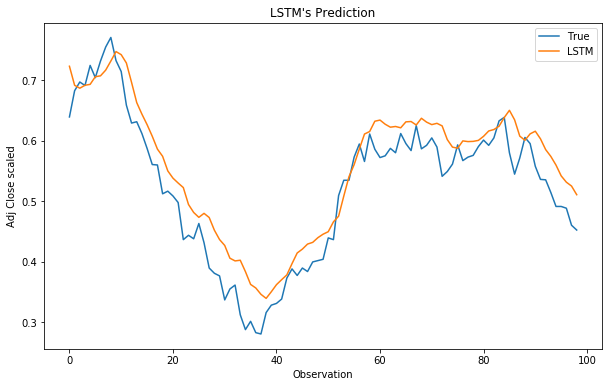

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_test), label='True')
plt.plot(np.asarray(y_pred_test_lstm), label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [ ]:
#résultat moins bien

In [ ]:
##################### tests deep learning

In [ ]:
##################### generation dataset steps

In [149]:
alphabet = np.array(courbe1)

seq_length = 4
dataX = []
dataY = []

for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char for char in seq_in])
	dataY.append(seq_out)
	print(seq_in,'->', seq_out)

[0.5518732  0.52161383 0.50432277 0.53674352] -> 0.5216138328530207
[0.52161383 0.50432277 0.53674352 0.52161383] -> 0.5273775216138326
[0.50432277 0.53674352 0.52161383 0.52737752] -> 0.5561959654178636
[0.53674352 0.52161383 0.52737752 0.55619597] -> 0.5612391930835692
[0.52161383 0.52737752 0.55619597 0.56123919] -> 0.5965417867435114
[0.52737752 0.55619597 0.56123919 0.59654179] -> 0.5482708933717539
[0.55619597 0.56123919 0.59654179 0.54827089] -> 0.5280979827089318
[0.56123919 0.59654179 0.54827089 0.52809798] -> 0.5605187319884699
[0.59654179 0.54827089 0.52809798 0.56051873] -> 0.5360230547550415
[0.54827089 0.52809798 0.56051873 0.53602305] -> 0.5525936599423602
[0.52809798 0.56051873 0.53602305 0.55259366] -> 0.539625360230545
[0.56051873 0.53602305 0.55259366 0.53962536] -> 0.5497118155619596
[0.53602305 0.55259366 0.53962536 0.54971182] -> 0.561959654178672
[0.55259366 0.53962536 0.54971182 0.56195965] -> 0.5244956772334248
[0.53962536 0.54971182 0.56195965 0.52449568] -> 0

[0.59654179 0.62319885 0.59221902 0.60518732] -> 0.6080691642651281
[0.62319885 0.59221902 0.60518732 0.60806916] -> 0.6023054755043198
[0.59221902 0.60518732 0.60806916 0.60230548] -> 0.5907780979827066
[0.60518732 0.60806916 0.60230548 0.5907781 ] -> 0.6217579250720462
[0.60806916 0.60230548 0.5907781  0.62175793] -> 0.601585014409217
[0.60230548 0.5907781  0.62175793 0.60158501] -> 0.5850144092218983
[0.5907781  0.62175793 0.60158501 0.58501441] -> 0.5691642651296789
[0.62175793 0.60158501 0.58501441 0.56916427] -> 0.5864553314121004
[0.60158501 0.58501441 0.56916427 0.58645533] -> 0.5461095100864526
[0.58501441 0.56916427 0.58645533 0.54610951] -> 0.5338616714697366
[0.56916427 0.58645533 0.54610951 0.53386167] -> 0.5086455331412054
[0.58645533 0.54610951 0.53386167 0.50864553] -> 0.5014409221901985
[0.54610951 0.53386167 0.50864553 0.50144092] -> 0.4827089337175785
[0.53386167 0.50864553 0.50144092 0.48270893] -> 0.474063400576366
[0.50864553 0.50144092 0.48270893 0.4740634 ] -> 0

[0.24783862 0.23991354 0.23847262 0.2370317 ] -> 0.2312680115273764
[0.23991354 0.23847262 0.2370317  0.23126801] -> 0.24063400576368466
[0.23847262 0.2370317  0.23126801 0.24063401] -> 0.2492795389048972
[0.2370317  0.23126801 0.24063401 0.24927954] -> 0.28602305475504153
[0.23126801 0.24063401 0.24927954 0.28602305] -> 0.28458213256483944
[0.24063401 0.24927954 0.28602305 0.28458213] -> 0.2759365994236305
[0.24927954 0.28602305 0.28458213 0.2759366 ] -> 0.3292507204610935
[0.28602305 0.28458213 0.2759366  0.32925072] -> 0.34077809798270664
[0.28458213 0.2759366  0.32925072 0.3407781 ] -> 0.3306916426512956
[0.2759366  0.32925072 0.3407781  0.33069164] -> 0.3177233429394768
[0.32925072 0.3407781  0.33069164 0.31772334] -> 0.4092219020172863
[0.3407781  0.33069164 0.31772334 0.4092219 ] -> 0.41426512968299534
[0.33069164 0.31772334 0.4092219  0.41426513] -> 0.4315561959654133
[0.31772334 0.4092219  0.41426513 0.4315562 ] -> 0.4632564841498521
[0.4092219  0.41426513 0.4315562  0.4632564

[0.60446686 0.63256484 0.63832853 0.57997118] -> 0.5446685878962505
[0.63256484 0.63832853 0.57997118 0.54466859] -> 0.5713256484149802
[0.63832853 0.57997118 0.54466859 0.57132565] -> 0.6051873198847241
[0.57997118 0.54466859 0.57132565 0.60518732] -> 0.5951008645533129
[0.54466859 0.57132565 0.60518732 0.59510086] -> 0.5576368876080657
[0.57132565 0.60518732 0.59510086 0.55763689] -> 0.5360230547550415
[0.60518732 0.59510086 0.55763689 0.53602305] -> 0.5353025936599387
[0.59510086 0.55763689 0.53602305 0.53530259] -> 0.5144092219020138
[0.55763689 0.53602305 0.53530259 0.51440922] -> 0.4913544668587875
[0.53602305 0.53530259 0.51440922 0.49135447] -> 0.4913544668587875
[0.53530259 0.51440922 0.49135447 0.49135447] -> 0.4884726224783833
[0.51440922 0.49135447 0.49135447 0.48847262] -> 0.4603746397694515
[0.49135447 0.49135447 0.48847262 0.46037464] -> 0.4524495677233418


In [151]:
X = np.reshape(dataX, (len(dataX), seq_length, 1))
Y = np.reshape(dataY, (len(dataY), 1, 1))


In [152]:
############################# lstm basque avec data steps

In [153]:
model2 = Sequential()
model2.add(LSTM(32, input_shape=(X.shape[1], X.shape[2]) ,  activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = model2.fit(X[:-400], np.array(dataY)[:-400], epochs=30, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/30
96/96 [==============================] - 2s 21ms/step - loss: 0.1362 - accuracy: 0.0000e+00
Epoch 2/30
96/96 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 3/30
96/96 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 4/30
96/96 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 5/30
96/96 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 00005: early stopping


In [154]:
y_pred_test_lstm = model2.predict(X,batch_size=1)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(dataY, np.array(y_pred_test_lstm))))

The R2 score on the Train set is:	0.892


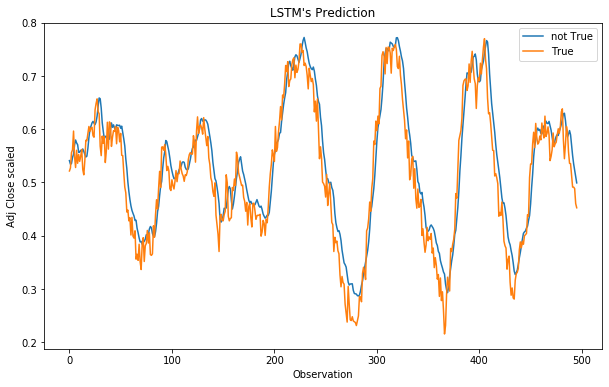

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_pred_test_lstm), label='not True')
plt.plot(np.asarray(dataY), label='True')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

In [156]:
########################### lstm statefull true avec dataset steps

In [172]:
modelsd = Sequential()
modelsd.add(LSTM(8,batch_input_shape=(1,X.shape[1], X.shape[2]),stateful=True,  activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))

modelsd.add(Dense(1))
modelsd.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = modelsd.fit(X[:-400], np.array(dataY)[:-400], epochs=30, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/30
96/96 [==============================] - 1s 13ms/step - loss: 0.4053 - accuracy: 0.0000e+00
Epoch 2/30
96/96 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 3/30
96/96 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 4/30
96/96 [==============================] - 1s 7ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 5/30
96/96 [==============================] - 1s 6ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 6/30
96/96 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 7/30
96/96 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 8/30
96/96 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 9/30
96/96 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 10/30
96/96 [==============================] - 1s 7ms/step - loss: 0.0023 -

The R2 score on the Train set is:	-0.234


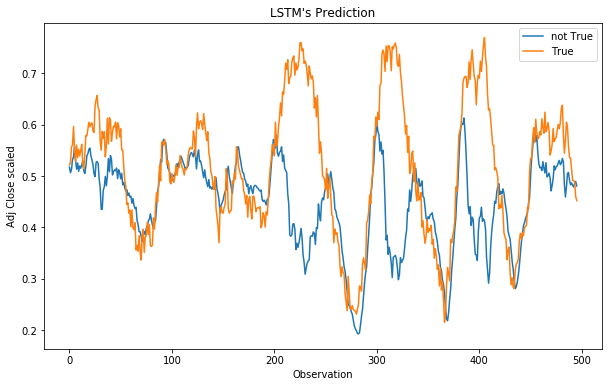

In [173]:
y_pred_test_lstm = modelsd.predict(X,batch_size=1)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(dataY, y_pred_test_lstm)))
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_pred_test_lstm), label='not True')
plt.plot(np.asarray(dataY), label='True')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();


In [159]:
#################### basique ANN avec data steps

In [164]:
lstm_model = Sequential()
lstm_model.add(LSTM(5, input_shape=(X.shape[1], X.shape[2]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X[:-400], np.array(dataY)[:-400], epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])


Epoch 1/100
96/96 [==============================] - 1s 15ms/step - loss: 0.4089
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2345
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1464
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0935
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0601
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0390
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0259
Epoch 8/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0180
Epoch 9/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0134
Epoch 10/100
96/96 [==============================] - 1s 12ms/step - loss: 0.0109
Epoch 11/100
96/96 [==============================] - 1s 10ms/step - loss: 0.0095
Epoch 12/100
96/96 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 13/100
96/96 [=============

The R2 score on the Train set is:	0.831


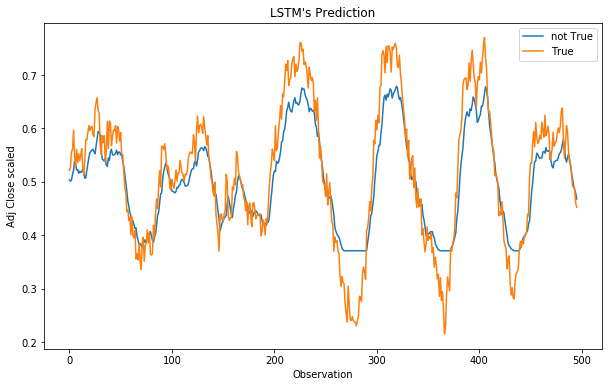

In [165]:
y_pred_test_lstm = lstm_model.predict(X,batch_size=1)
print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(dataY, y_pred_test_lstm)))
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_pred_test_lstm), label='not True')
plt.plot(np.asarray(dataY), label='True')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();


In [ ]:
#bon globalement c'est pas mal.

In [ ]:
########################################################
######################################################## prédiciton sur courbe normal/attaque
########################################################




In [ ]:
######################## holt winter 4 points prediction sur courbe normale

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to conver

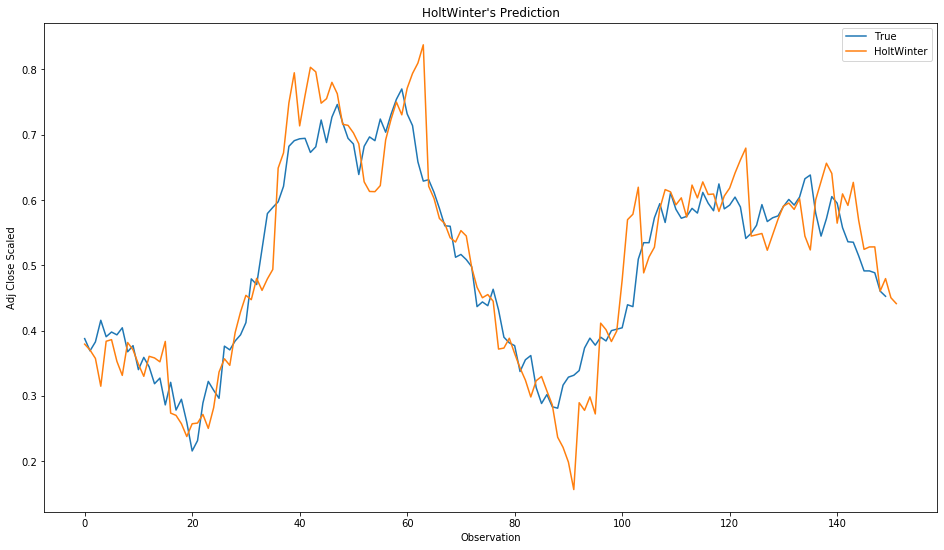

In [7]:
Courbe = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20


#pred = fit1.predict(start=courbe1.index[0], end=test.index[-1])
pointspred = []
for i in range(350,500,4):
    tempo = Courbe[0:i]
    fit1 = ExponentialSmoothing(np.asarray(tempo) , trend='add', seasonal='add',  seasonal_periods=150 ).fit()
    pred = fit1.forecast(4)
    for predic in pred:
        pointspred.append(predic)
    
#print(pointspred)


   


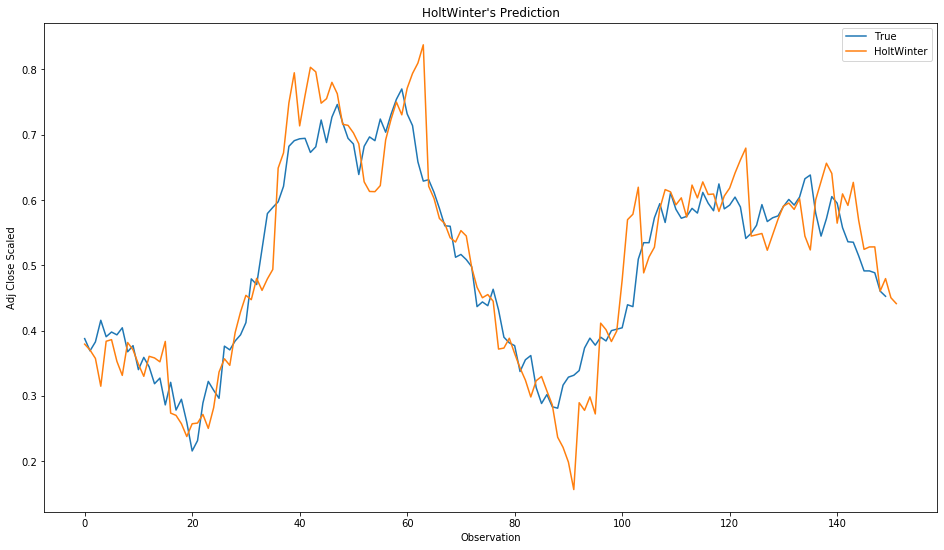

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(np.asarray(Courbe[350:500]), label='True')
plt.plot(pointspred, label='HoltWinter')
plt.title("HoltWinter's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

In [13]:
print("The R2 score :\t{:0.3f}".format(metrics.r2_score(Courbe[350:500], pointspred[:-2])))


The R2 score :	0.822


In [ ]:
#prédiction sur courbe normal score : 0.8

In [ ]:
############################################### prédiction sur attaque 

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


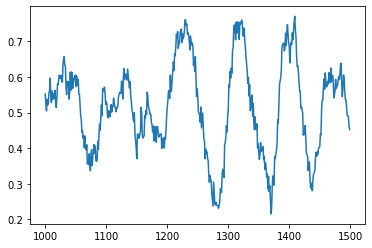

In [9]:
plt.plot(ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20)

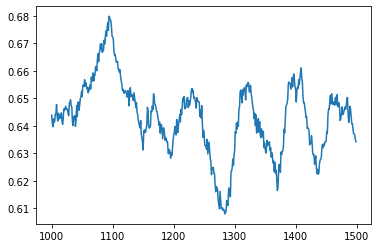

In [23]:
plt.plot(ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 2].xmeas_20)

In [ ]:
############################################################## prédiction attaque sur step 1 point

# on commence par faire un model avec une courbe normale puis on passe on compare les prédiction sur cette meme courbe 
# et sur une courbe où il y a une attaque

In [11]:
courbenormal = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20



train = courbenormal[0:400]
test = courbenormal[400:500]

X_train = train[:-1]
y_train = train[1:]


X_test = test[:-1]
y_test = test[1:]

X_train_lmse = np.reshape(np.array(X_train), (X_train.shape[0], 1, 1))
X_test_lmse = np.reshape(np.array(X_test), (X_test.shape[0], 1, 1))


lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])






/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Epoch 1/100
399/399 [==============================] - 3s 8ms/step - loss: 0.0360
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0017
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0014
Epoch 5/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0012
Epoch 6/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 9/100
399/399 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 00010: early stopping


In [13]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)

print("The R2 score on the Train set is:\t{:0.3f}".format(metrics.r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(metrics.r2_score(y_test, y_pred_test_lstm)))

#très bon score sur la courbe de non-attaque

The R2 score on the Train set is:	0.919
The R2 score on the Test set is:	0.914


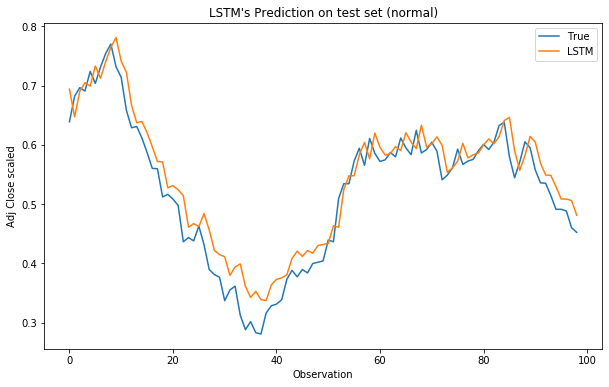

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_test), label='True')
plt.plot(np.asarray(y_pred_test_lstm), label='LSTM')
plt.title("LSTM's Prediction on test set (normal)")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


prédiction sur courbe attaque
The R2 score :	0.573


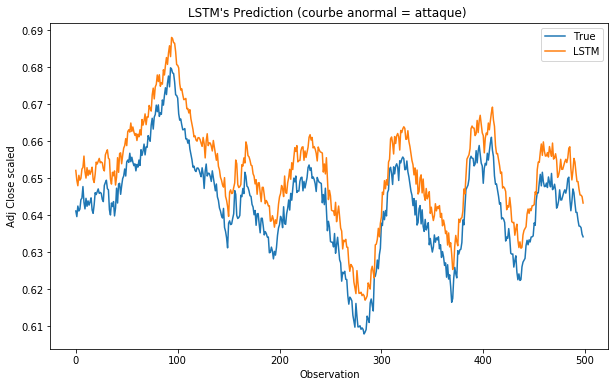

In [17]:






testF=  ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 2].xmeas_20


X_testF= testF[:-1]
y_testF = testF[1:]
X_testF_lmse = np.reshape(np.array(X_testF), (X_testF.shape[0], 1, 1))


y_pred_testF_lstm = lstm_model.predict(X_testF_lmse)
print("prédiction sur courbe attaque")
print("The R2 score :\t{:0.3f}".format(metrics.r2_score(y_testF, y_pred_testF_lstm)))


plt.figure(figsize=(10, 6))
plt.plot(np.asarray(y_testF), label='True')
plt.plot(np.asarray(y_pred_testF_lstm), label='LSTM')
plt.title("LSTM's Prediction (courbe anormal = attaque) ")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();


#la prédiction est moins bonne sur la bourbe où il ya une attaque

In [ ]:
# la prédiction sur une courbe d'attaque est bien moins correcte, ce qui est bon signe pour la détection

In [ ]:
############################################################## prédiction attaque sur step 3 points

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


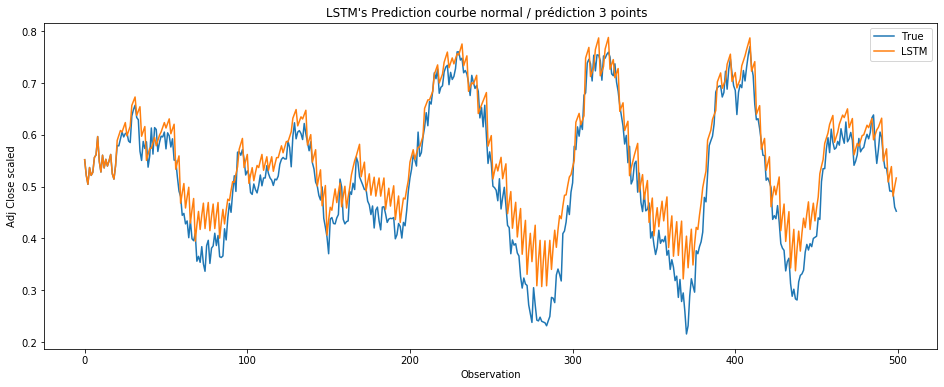

The R2 score on the train set is:	0.777
The R2 score on the test set is:	0.793


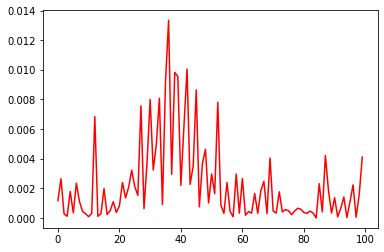

In [23]:
courbenormal = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20.values
cc2 = []
anPred = 0
for id in range(0,500):
    if id <= 19:
        cc2.append(courbenormal[id])
        anPred = lstm_model.predict(np.array([[[courbenormal[id]]]]))[0][0]
    elif id%3 == 0:
        anPred = lstm_model.predict(np.array([[[courbenormal[id]]]]))[0][0]
        cc2.append(anPred)
        anPred = lstm_model.predict(np.array([[[anPred]]]))[0][0]
        cc2.append(anPred)
        anPred = lstm_model.predict(np.array([[[anPred]]]))[0][0]
        cc2.append(anPred)


plt.figure(figsize=(16, 6))
plt.plot(courbenormal, label='True')
plt.plot(np.asarray(cc2), label='LSTM')
plt.title("LSTM's Prediction courbe normal / prédiction 3 points  ")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

print("The R2 score on the train set is:\t{:0.3f}".format(metrics.r2_score(cc2[20:500], courbenormal[20:500])))
print("The R2 score on the test set is:\t{:0.3f}".format(metrics.r2_score(cc2[400:500], courbenormal[400:500])))
plt.plot(((cc2[400:500] - courbenormal[400:500]) ** 2), 'r', label='Root-mean-square deviation')

In [ ]:
################# même chose mais sur une courbe d'attaque

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


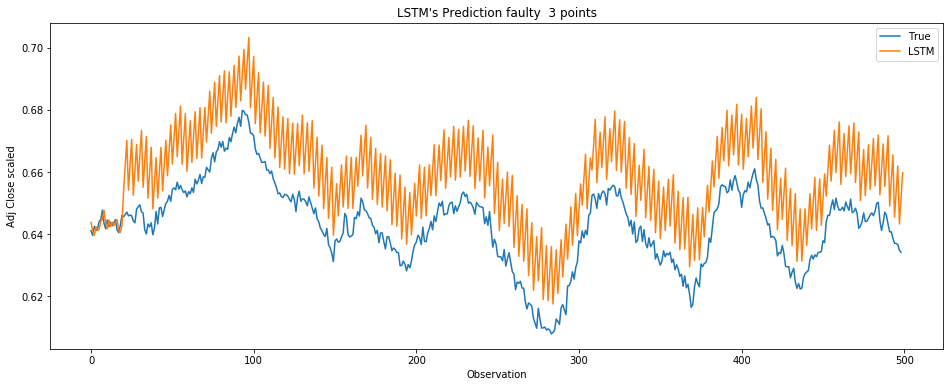

The R2 score on the attack curve:	-163.070


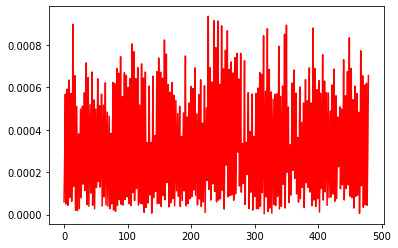

In [31]:
courbeAnormal =  ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 2].xmeas_20.values
cc2 = []
anPred = 0
for id in range(0,500):
    if id <= 19:
        cc2.append(courbeAnormal[id])
        anPred = lstm_model.predict(np.array([[[courbeAnormal[id]]]]))[0][0]
    elif id%3 == 0:
        anPred = lstm_model.predict(np.array([[[courbeAnormal[id]]]]))[0][0]
        cc2.append(anPred)
        anPred = lstm_model.predict(np.array([[[anPred]]]))[0][0]
        cc2.append(anPred)
        anPred = lstm_model.predict(np.array([[[anPred]]]))[0][0]
        cc2.append(anPred)


plt.figure(figsize=(16, 6))
plt.plot(np.asarray(y_testF), label='True')
plt.plot(np.asarray(cc2), label='LSTM')
plt.title("LSTM's Prediction faulty  3 points")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

print("The R2 score on the attack curve:\t{:0.3f}".format(metrics.r2_score(cc2[20:500], courbenormal[20:500])))

plt.plot(((cc2[20:500] - courbeAnormal[20:500]) ** 2), 'r', label='Root-mean-square deviation')

In [ ]:
#sur la courbe d'attaque, la prédiction est très mauvaise. contrairement à la courbe normale

In [ ]:
## test ar

In [87]:
from statsmodels.tsa.ar_model import AR

In [89]:
courbe1 = ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20


train, test = courbe1[0:400], courbe1[400:500]

model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib64/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyError: 0

In [ ]:
#arima vraiement trop dur à utiliser

In [ ]:
# autre

In [91]:
import scipy

In [101]:
scipy.stats.energy_distance(ALL[ALL['simulationRun'] == 1][ALL['faultNumber'] == 0].xmeas_20,ALL[ALL['simulationRun'] == 3][ALL['faultNumber'] == 0].xmeas_20)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.08936393872624791

In [102]:
from sklearn.covariance import MinCovDet

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ValueError: Expected 2D array, got 1D array instead:
array=[0.50432277 0.51008646 0.51585014 0.53962536 0.49639769 0.5259366
 0.53602305 0.52017291 0.52665706 0.56772334 0.50288184 0.54899135
 0.55979827 0.51224784 0.50288184 0.53602305 0.52809798 0.51585014
 0.53602305 0.51368876 0.52089337 0.49351585 0.51729107 0.52233429
 0.51585014 0.48919308 0.48487032 0.52737752 0.47550432 0.46685879
 0.44740634 0.45172911 0.44164265 0.43948127 0.40273775 0.42723343
 0.3926513  0.44524496 0.41210375 0.43227666 0.39913545 0.43804035
 0.4574928  0.40417867 0.41498559 0.40201729 0.39409222 0.42795389
 0.44164265 0.38544669 0.43011527 0.44740634 0.4315562  0.42146974
 0.43443804 0.44668588 0.4351585  0.45100865 0.48342939 0.44020173
 0.49567723 0.52665706 0.52881844 0.56051873 0.54178674 0.52161383
 0.48919308 0.49351585 0.52881844 0.51945245 0.54610951 0.54178674
 0.50576369 0.51008646 0.5        0.45965418 0.44956772 0.47118156
 0.43948127 0.46685879 0.43948127 0.44884726 0.48054755 0.46253602
 0.42291066 0.43804035 0.45677233 0.40850144 0.45389049 0.43011527
 0.41426513 0.47982709 0.43731988 0.49639769 0.50360231 0.54106628
 0.54394813 0.51512968 0.53674352 0.53746398 0.51873199 0.53170029
 0.52377522 0.51512968 0.5129683  0.5129683  0.51512968 0.5389049
 0.56123919 0.54827089 0.54610951 0.58429395 0.57853026 0.56340058
 0.57420749 0.6037464  0.60951009 0.65057637 0.60806916 0.62247839
 0.6073487  0.61527378 0.55331412 0.56772334 0.57708934 0.59293948
 0.59870317 0.62391931 0.61239193 0.58717579 0.58645533 0.57997118
 0.58645533 0.52233429 0.54106628 0.50792507 0.46469741 0.43587896
 0.43876081 0.42651297 0.42435159 0.40634006 0.44020173 0.44884726
 0.44524496 0.43083573 0.41282421 0.43299712 0.44236311 0.48414986
 0.46253602 0.42795389 0.47334294 0.45389049 0.4481268  0.39769452
 0.40489914 0.41282421 0.42507205 0.42002882 0.40129683 0.38904899
 0.41426513 0.3962536  0.41786744 0.39697406 0.39841499 0.39121037
 0.37247839 0.36527378 0.38184438 0.39337176 0.38256484 0.40706052
 0.43587896 0.4056196  0.40129683 0.45100865 0.4092219  0.45244957
 0.48559078 0.45028818 0.52521614 0.5295389  0.55691643 0.56268012
 0.57853026 0.56412104 0.56628242 0.54610951 0.53602305 0.56772334
 0.54682997 0.55403458 0.51368876 0.5554755  0.54538905 0.58573487
 0.5684438  0.56772334 0.58285303 0.56412104 0.55115274 0.54610951
 0.58789625 0.57997118 0.56628242 0.55691643 0.57492795 0.58429395
 0.53242075 0.54034582 0.49711816 0.49567723 0.47766571 0.53242075
 0.50864553 0.53674352 0.54755043 0.49783862 0.47982709 0.51440922
 0.48991354 0.44668588 0.43227666 0.41570605 0.45893372 0.44956772
 0.49567723 0.47838617 0.46397695 0.48126801 0.51080692 0.49567723
 0.50288184 0.50792507 0.51729107 0.54178674 0.51801153 0.50720461
 0.50144092 0.50720461 0.48919308 0.53602305 0.54322767 0.51657061
 0.54755043 0.5648415  0.51368876 0.53025937 0.52377522 0.53962536
 0.56051873 0.59942363 0.60446686 0.5389049  0.5778098  0.57925072
 0.62608069 0.58789625 0.54827089 0.57997118 0.5778098  0.59005764
 0.59582133 0.54610951 0.59798271 0.56195965 0.57925072 0.54034582
 0.52809798 0.53674352 0.48414986 0.47622478 0.48270893 0.46974063
 0.46829971 0.50576369 0.47550432 0.4870317  0.51657061 0.51224784
 0.46397695 0.50072046 0.45389049 0.4704611  0.43227666 0.4574928
 0.4221902  0.41426513 0.38976945 0.38400576 0.40057637 0.36599424
 0.40489914 0.42651297 0.40489914 0.35951009 0.37536023 0.35230548
 0.36311239 0.41066282 0.3926513  0.39697406 0.39769452 0.43443804
 0.47694524 0.44740634 0.45317003 0.4481268  0.49567723 0.48342939
 0.5295389  0.5648415  0.54394813 0.60158501 0.60302594 0.64553314
 0.6815562  0.69308357 0.72910663 0.69668588 0.76729107 0.7240634
 0.73559078 0.75072046 0.74495677 0.75072046 0.74423631 0.71397695
 0.69956772 0.69524496 0.62608069 0.65850144 0.66066282 0.62391931
 0.62463977 0.61815562 0.58285303 0.55979827 0.5814121  0.5295389
 0.51585014 0.52521614 0.56700288 0.49639769 0.47550432 0.47262248
 0.46757925 0.43587896 0.46037464 0.47190202 0.43948127 0.44740634
 0.4481268  0.44164265 0.45533141 0.4092219  0.43011527 0.41930836
 0.42002882 0.40201729 0.43804035 0.41642651 0.3832853  0.37680115
 0.38760807 0.33789625 0.33645533 0.33861671 0.32564841 0.36527378
 0.35662824 0.36311239 0.38184438 0.3573487  0.35446686 0.38112392
 0.40129683 0.40273775 0.40345821 0.41498559 0.42723343 0.45605187
 0.45533141 0.46685879 0.5259366  0.52737752 0.55043228 0.54106628
 0.54971182 0.55115274 0.54899135 0.56628242 0.55979827 0.55691643
 0.56195965 0.59221902 0.61455331 0.62824207 0.5814121  0.62896254
 0.63976945 0.63256484 0.61887608 0.66282421 0.66642651 0.65417867
 0.66426513 0.67939481 0.68876081 0.68587896 0.68371758 0.5907781
 0.56700288 0.60302594 0.58861671 0.58069164 0.57925072 0.57420749
 0.56195965 0.57492795 0.57853026 0.59005764 0.59149856 0.56700288
 0.59942363 0.60014409 0.60230548 0.57348703 0.59365994 0.62536023
 0.56556196 0.60951009 0.59005764 0.58213256 0.58069164 0.59293948
 0.57997118 0.58573487 0.5907781  0.58501441 0.56123919 0.58717579
 0.55043228 0.57420749 0.5554755  0.5684438  0.56628242 0.54682997
 0.53674352 0.54322767 0.49639769 0.48775216 0.47622478 0.48919308
 0.49927954 0.4574928  0.4704611  0.45965418 0.45965418 0.4574928
 0.43659942 0.44596542 0.43299712 0.41210375 0.42074928 0.42867435
 0.40850144 0.38040346 0.40273775 0.43083573 0.40129683 0.39697406
 0.36311239 0.35951009 0.3573487  0.40778098 0.37463977 0.40345821
 0.41714697 0.42435159 0.43011527 0.43804035 0.43443804 0.48270893
 0.49567723 0.5259366  0.49351585 0.55331412 0.52305476 0.48559078
 0.52737752 0.51368876 0.5648415  0.55115274 0.51657061 0.52449568
 0.55043228 0.53746398].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
cov

In [107]:
gen_cov = np.eye(4)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(100, 4), gen_cov)

In [108]:
X

array([[ 1.26104319e+00, -4.79911538e-01, -3.18047402e-01,
         7.90618185e-01],
       [ 5.58368520e-01,  1.32343679e+00, -8.75140150e-01,
        -1.07124487e+00],
       [-6.46806219e-01,  6.30468643e-01,  7.62393859e-01,
         6.40127243e-01],
       [-2.41036610e+00,  7.28703891e-01, -1.63960383e-01,
        -4.44567228e-01],
       [ 1.71174323e-01,  1.54567729e+00,  5.89713468e-01,
         7.20965935e-01],
       [ 3.89137901e-01,  1.30880655e+00, -3.91322650e-01,
         6.29636003e-01],
       [ 5.56600650e-01,  9.35618036e-01,  6.31761547e-01,
         3.13951172e-01],
       [ 2.06022410e+00, -2.68853788e-01,  4.66312878e-02,
         1.05899082e+00],
       [-2.16781737e+00,  6.67975816e-01,  1.07853901e+00,
        -8.92078048e-01],
       [-7.99746110e-01,  3.41980134e-01, -2.53066549e-01,
         1.46723963e+00],
       [-2.70697411e-01,  1.11699216e+00, -7.27895343e-01,
        -1.55655571e+00],
       [-1.97417364e+00, -5.27119944e-02, -6.35433570e-02,
      

In [ ]:
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.

In [110]:
gen_covcov = MinCovDet(random_state=0).fit(X)

In [111]:
gen_covcov

MinCovDet(assume_centered=False, random_state=0, store_precision=True,
          support_fraction=None)

In [ ]:
# trop compliqué également